In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Load dataset
df = pd.read_csv("Twitter_Data.csv")

In [12]:
# Drop missing values
df = df.dropna()

# Convert category to integer
df["category"] = df["category"].astype(int)

In [13]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
df["clean_text"] = df["clean_text"].apply(clean_text)

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["category"], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [16]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.922961281217402
Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.82      0.86      7152
           0       0.91      0.98      0.94     11067
           1       0.94      0.93      0.94     14375

    accuracy                           0.92     32594
   macro avg       0.92      0.91      0.91     32594
weighted avg       0.92      0.92      0.92     32594



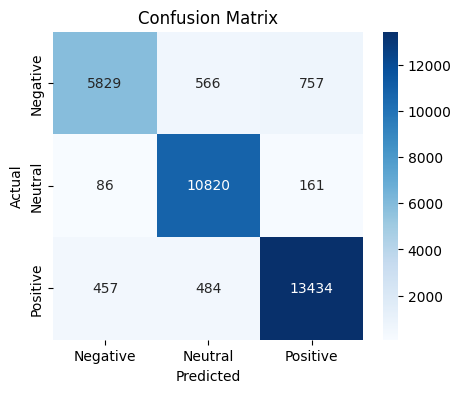

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()